Medical Appointment Exploratory Data Analysis

1. Importing libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from time import strftime

2. Loading dataset

In [94]:
# Reading the dataset
df = pd.read_csv('Data.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


3. Information related to dataset

In [95]:
df.shape

(110527, 14)

In [96]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


4. Data Cleaning

In [97]:
# Modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [98]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [99]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [100]:
# Changing the name of some cloumns
df= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [101]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [103]:
# Dropping some columns which have no significance
df.drop(['Neighbourhood', 'NoShow'], axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0


In [104]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


c:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


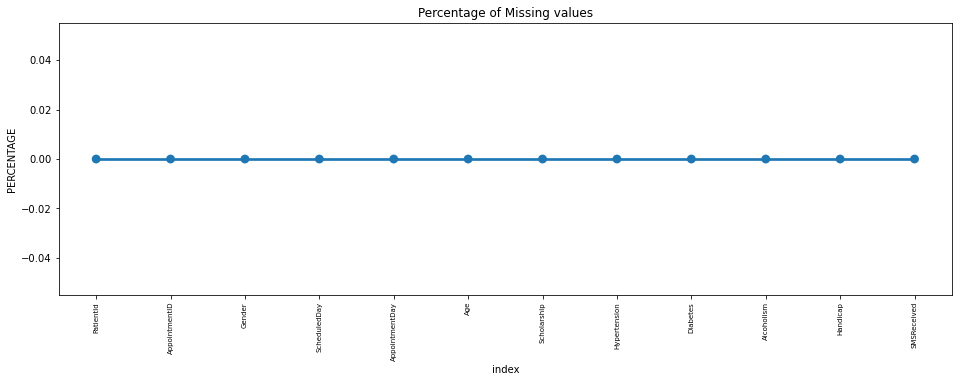

In [105]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

5. Question regarding the dataset

In [106]:
# Get the max tenure
print(df['Age'].max())

115


In [121]:
# Print out the details of patient who have diabetes.
df.query('Diabetes == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0
36,7.298459e+13,5637975,F,2016-04-29,2016-04-29,63,0,1,1,0,0,0
37,1.578132e+12,5637986,F,2016-04-29,2016-04-29,64,1,1,1,0,0,0
41,8.224325e+14,5633339,F,2016-04-28,2016-04-29,71,0,0,1,0,0,0
44,2.741649e+11,5635414,F,2016-04-28,2016-04-29,78,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110448,2.629184e+14,5756082,F,2016-06-01,2016-06-06,40,0,1,1,0,0,1
110456,4.994742e+12,5772107,F,2016-06-03,2016-06-03,79,0,1,1,0,0,0
110468,3.227475e+11,5763322,F,2016-06-02,2016-06-07,76,0,1,1,0,0,1
110477,2.798494e+13,5673472,F,2016-05-09,2016-06-06,67,0,0,1,0,0,1


In [120]:
# Print out the details of patient who have appointment on date "2016-06-07".
df.query('AppointmentDay == "2016-06-07"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
84108,8.853122e+12,5750675,M,2016-05-31,2016-06-07,3,0,0,0,0,0,1
84110,5.888749e+13,5776757,F,2016-06-06,2016-06-07,38,1,1,0,1,0,0
84111,6.764466e+12,5750673,M,2016-05-31,2016-06-07,0,0,0,0,0,0,1
84122,1.538134e+13,5780081,M,2016-06-07,2016-06-07,20,0,0,0,0,0,0
84123,7.395230e+12,5768423,F,2016-06-03,2016-06-07,22,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1


6. Perform exploratory analysis & visualization using Matplotlib & Seaborn

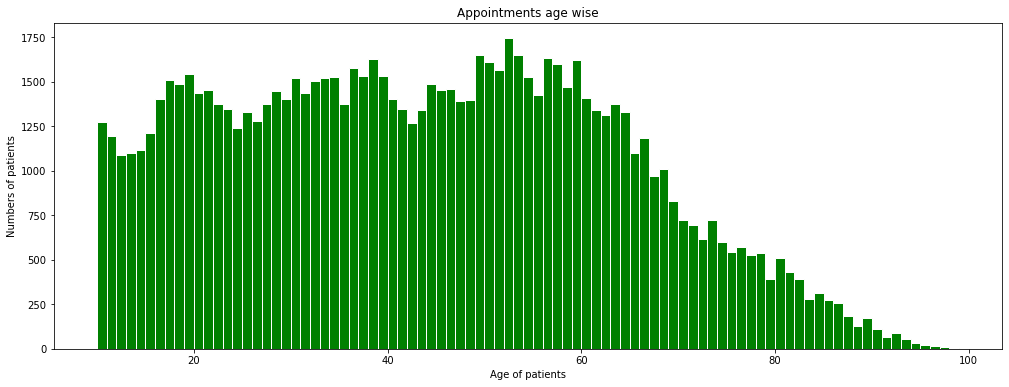

In [ ]:
# Age distribution of players using histogram
plt.figure(figsize=(17,6))
plt.hist(df.Age, bins=np.arange(10,100), color="Green", edgecolor = 'white')
plt.title("Appointments age wise")
plt.xlabel('Age of patients')
plt.ylabel('Numbers of patients')
plt.show()

([<matplotlib.patches.Wedge at 0x22bce14faf0>,
 [Text(-0.49931844945362497, 0.9801434007507411, 'F'),
  Text(0.4993183576859747, -0.9801434475003041, 'M')],
 [Text(-0.2723555178837954, 0.5346236731367678, '64.998%'),
  Text(0.27235546782871345, -0.5346236986365295, '35.002%')])

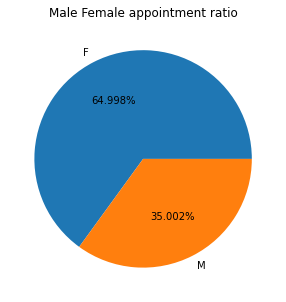

In [ ]:
# Pie chart of appointments in terms of gender
from tokenize import Whitespace


gender = df.Gender.value_counts()
plt.figure(figsize=(10,5))
plt.title("Male Female appointment ratio")
plt.pie(gender, labels=gender.index, autopct='%1.3f%%')